In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Telco_customer_churn.csv'
telco_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
telco_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [21]:
telco_data.shape
telco_data.info()
telco_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [10]:
# Calculating the current churn rate
churn_rate = telco_data['Churn Value'].mean()

churn_rate_percentage = churn_rate * 100
churn_rate_percentage


26.536987079369588

In [13]:
# Let's check the dataset's size, scope, and if there are any missing values

# Size and scope
dataset_size = telco_data.shape
dataset_scope = telco_data.columns.tolist()

# Checking for missing values
missing_values = telco_data.isnull().sum()

dataset_size, dataset_scope, missing_values[missing_values > 0]



((7043, 33),
 ['CustomerID',
  'Count',
  'Country',
  'State',
  'City',
  'Zip Code',
  'Lat Long',
  'Latitude',
  'Longitude',
  'Gender',
  'Senior Citizen',
  'Partner',
  'Dependents',
  'Tenure Months',
  'Phone Service',
  'Multiple Lines',
  'Internet Service',
  'Online Security',
  'Online Backup',
  'Device Protection',
  'Tech Support',
  'Streaming TV',
  'Streaming Movies',
  'Contract',
  'Paperless Billing',
  'Payment Method',
  'Monthly Charges',
  'Total Charges',
  'Churn Label',
  'Churn Value',
  'Churn Score',
  'CLTV',
  'Churn Reason'],
 Churn Reason    5174
 dtype: int64)

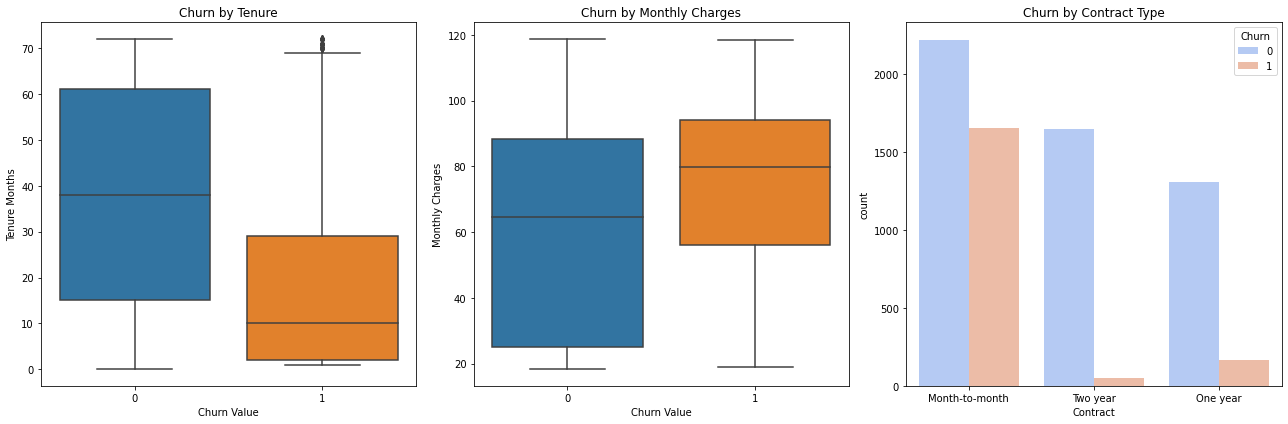

In [19]:
# Visualizing some key factors influencing churn: tenure, monthly charges, and contract type

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Tenure vs Churn
sns.boxplot(x='Churn Value', y='Tenure Months', data=telco_data, ax=ax[0])
ax[0].set_title('Churn by Tenure')

# Monthly Charges vs Churn
sns.boxplot(x='Churn Value', y='Monthly Charges', data=telco_data, ax=ax[1])
ax[1].set_title('Churn by Monthly Charges')

# Contract Type vs Churn
sns.countplot(x='Contract', hue='Churn Value', data=telco_data, ax=ax[2], palette='coolwarm')
ax[2].set_title('Churn by Contract Type')
ax[2].legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

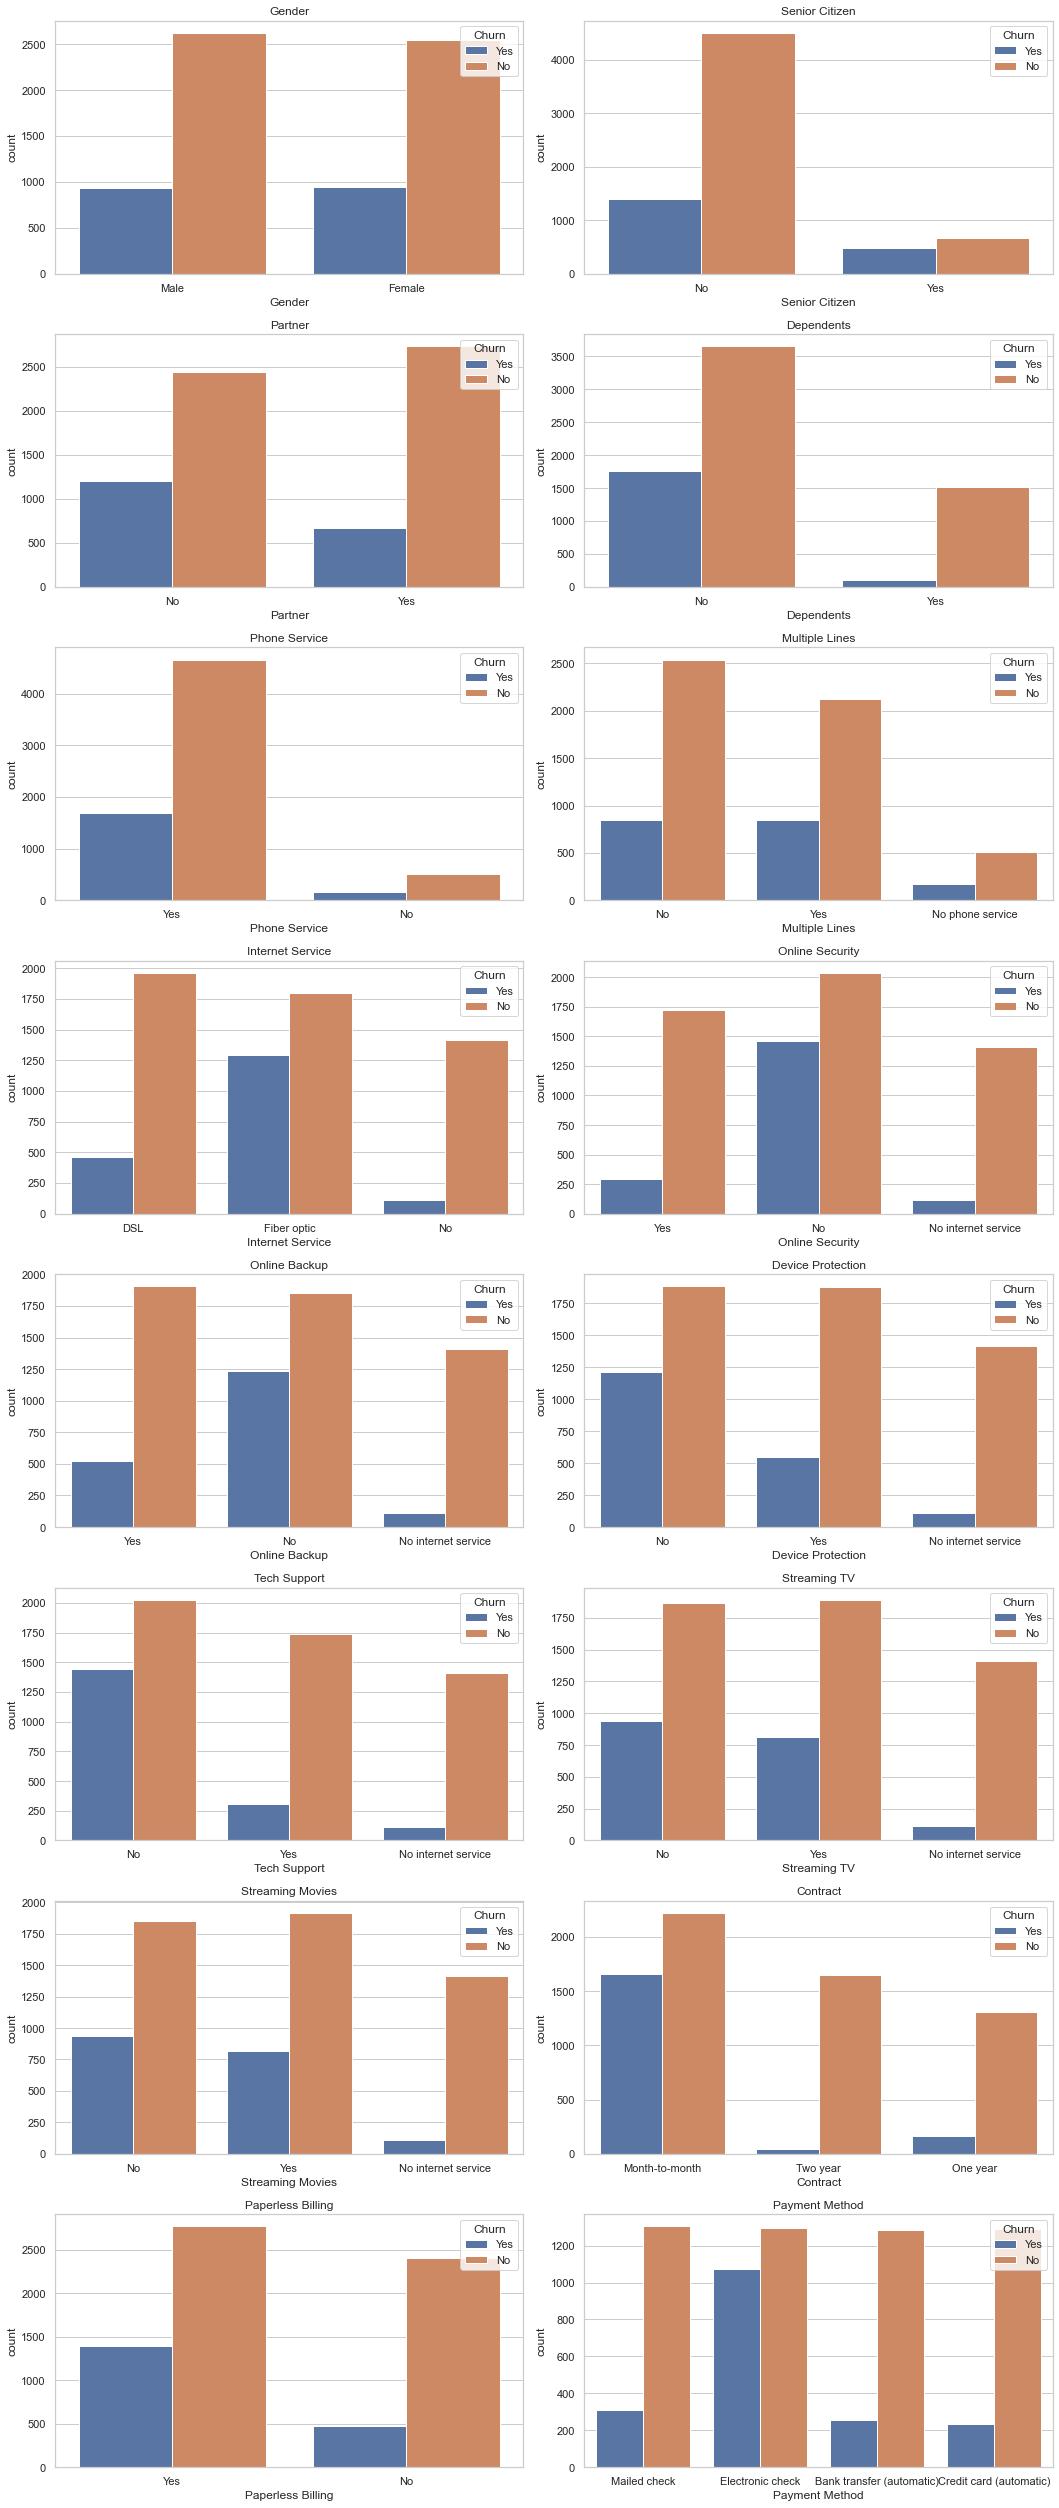

In [8]:
# Handling missing values in 'Total Charges'
# Since there are only 11 missing values, we can consider removing these rows given the dataset's size

telco_data_cleaned = telco_data.dropna(subset=['Total Charges'])

# Verifying that the missing values have been removed
missing_values_after_cleaning = telco_data_cleaned.isnull().sum()

# Proceeding with preliminary EDA
# Examining the distributions of key variables and their relationship with churn
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the environment for visualizations
sns.set(style="whitegrid")

# Analyzing the distribution of key categorical variables and their relationship with churn
categorical_vars = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 
                    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 
                    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 
                    'Contract', 'Paperless Billing', 'Payment Method']

# Plotting the distribution of these variables
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 35))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='Churn Label', data=telco_data_cleaned, ax=axes[i])
    axes[i].set_title(var)
    axes[i].legend(title="Churn", loc='upper right')

plt.tight_layout()
plt.show()


## The visualizations provide insights into the distribution of key categorical variables and their relationship with customer churn:

### Gender

    Distribution Equality: The distribution between male and female customers is roughly equal.
    Churn Rates: No significant difference in churn rates between genders.

### Senior Citizen

    Customer Proportion: A smaller portion of customers are senior citizens.
    Churn Rates: Higher churn rate among senior citizens compared to non-senior citizens.

### Partner and Dependents

    Churn Trends: Customers without partners or dependents tend to churn more compared to those with them.

### Phone Service

    Service Adoption: Most customers have phone service.
    Churn Rates: No significant difference in churn rates between those with and without phone service.

### Multiple Lines

    Churn Trend: Slightly higher churn rate for customers with multiple lines.

### Internet Service

    Service Types: Customers with fiber optic internet service show a notably higher churn rate.
    Comparison: Higher churn rates compared to those with DSL or no internet service.

### Online Security, Online Backup, Device Protection, Tech Support

    Service Impact: Customers without these services tend to have higher churn rates.

### Streaming TV, Streaming Movies

    Subscription Impact: Higher churn rates among subscribers, especially those with streaming TV.

### Contract

    Contract Type Impact: Customers on month-to-month contracts exhibit a much higher churn rate.
    Comparison: Lower churn rates for one-year or two-year contracts.

### Paperless Billing

    Billing Method: Customers who use paperless billing churn more than those who do not.

### Payment Method

    Variation in Churn: The churn rate varies significantly with different payment methods.
    Highest Churn: Most notable for customers using electronic checks.

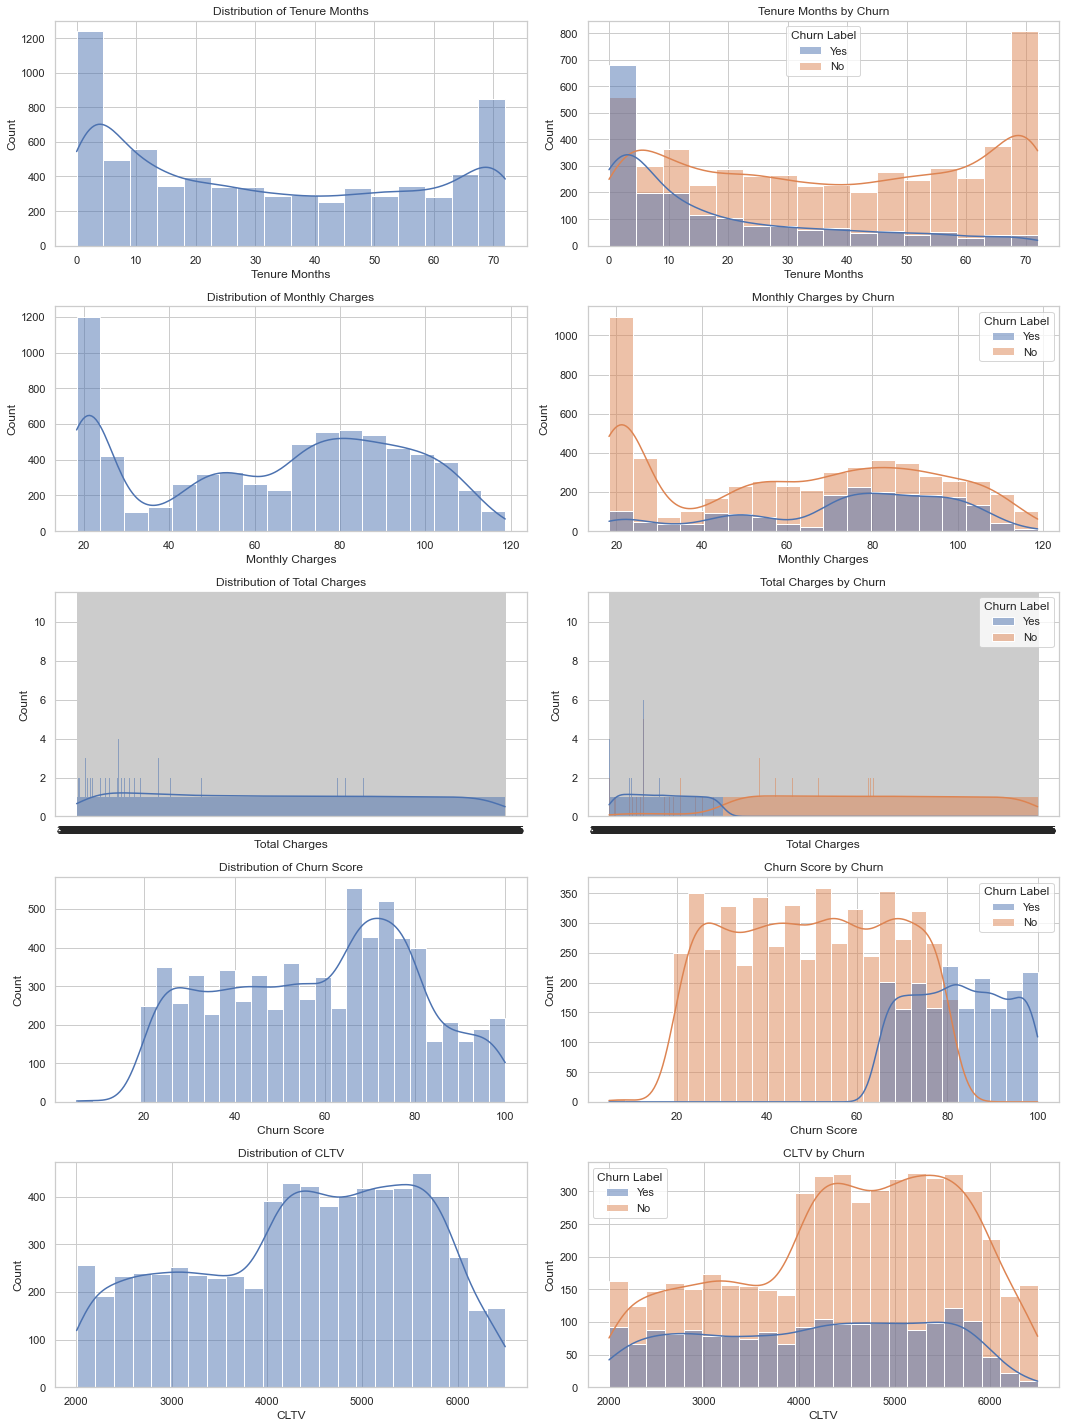

In [9]:
# Analyzing the distribution of key numerical variables
numerical_vars = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

# Plotting the distribution of these variables
fig, axes = plt.subplots(nrows=len(numerical_vars), ncols=2, figsize=(15, 20))

for i, var in enumerate(numerical_vars):
    # Distribution of the variable
    sns.histplot(telco_data_cleaned[var], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {var}')

    # Distribution of the variable split by churn
    sns.histplot(telco_data_cleaned, x=var, hue='Churn Label', kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'{var} by Churn')

plt.tight_layout()
plt.show()


## Insights from Numerical Variable Distributions and Churn Relationship
### Tenure Months

    Distribution Pattern: The distribution shows a bimodal pattern, with a significant number of customers being either new (low tenure) or long-term (high tenure).
    Churn Relation: Customers with lower tenure are more likely to churn, as seen in the churn split histogram.

### Monthly Charges

    Range of Charges: A wide range of monthly charges are observed.
    Churn Relation: Higher monthly charges are associated with a greater likelihood of churn.

### Total Charges

    Distribution Skew: The distribution is skewed towards lower total charges, indicating many customers are either new or have lower monthly charges.
    Churn Relation: Customers with lower total charges (potentially newer customers) have a higher churn rate.

### Churn Score

    Score Distribution: The churn score shows a broad distribution.
    Churn Correlation: Higher churn scores correlate with a higher likelihood of actual churn.

### CLTV (Customer Lifetime Value)

    Distribution Range: CLTV is widely distributed, reflecting the diverse customer base in terms of profitability and engagement.
    Churn Relation: There's a less clear relationship between CLTV and churn, suggesting that high-value customers can both churn and stay.